# Topic Modeling on TripAdvisor Reviews 

- Create wordclouds for reviews on Gardens by the Bay
- Topic modeling 

In [30]:
#import the relevant libraries 
import numpy as np 
import pandas as pd 
import nltk
import re
#to display all graphs plotted 
%matplotlib inline

In [2]:
#import the relevant nlp libraries
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Step1: Clean the text

In [31]:
# load the reviews 
df = pd.read_excel('Garden_By_the_Bay_latest.xlsx')
df.head()

,date,rating,title,review
0,2018-10-25,50,Don??t miss this!,"Well worth a visit, especially after dark when..."
1,2018-10-25,50,First time going gardens by the bay,Is was a very enjoyable day with all the beaut...
2,2018-10-25,50,Trip with my friends,So wonderful and so great for the light and so...
3,2018-10-25,30,Missing direction and information,It was very enjoy full visit to garden but mai...
4,2018-10-25,50,If you miss this.. then you are a fool,I??m going to review this from a typical mans...


## Clean each review
- remove the symbols 
- remove \r and \n 
- change all string to lower 


In [34]:
# create a function to clean the text
def clean_text(r):
        r1 = re.sub(r"[®'&$\?’\"\-();:!\\/(\)+:[\]]", '', r) #remove all symbols
        r1 = r1.replace('\r', '') #replace \r into space 
        r1 = r1.replace('\n', '')#replace \n into space
        r1 = r1.replace('\x80', '')
        r1 = r1.replace('.', ' ')
        r1 = r1.replace(',', ' ')
        r1 = r1.replace('? ?', '')
        r1 = r1.replace('Show less', '')# replace all show less phrase into space
        r1 = r1.lower()
        r1 = r1.strip() #remove whitespace
        r1 = re.sub(r"[\s]+", ' ', r1) #replace multiple whitespace into a single space
        return r1 
    

In [50]:
# clean the review column 
df.review = df.review.apply(clean_text)
# convert the column to list 
df.head()

,date,rating,title,review
0,2018-10-25,50,Don??t miss this!,well worth a visit especially after dark when ...
1,2018-10-25,50,First time going gardens by the bay,is was a very enjoyable day with all the beaut...
2,2018-10-25,50,Trip with my friends,so wonderful and so great for the light and so...
3,2018-10-25,30,Missing direction and information,it was very enjoy full visit to garden but mai...
4,2018-10-25,50,If you miss this.. then you are a fool,im going to review this from a typical mans po...


# Step 2: Filtering reviews based on rating


## Run the following cell to filter reviews above or below certain number of starts 

In [56]:
# set your conditions here 
# get reviews above 4 stars
df_filtered = df[df.rating >= 40] 
# get reviews below 3 stars
#df = df[df.rating <= 30]

In [57]:
df_filtered.head()

,date,rating,title,review
0,2018-10-25,50,Don??t miss this!,well worth a visit especially after dark when ...
1,2018-10-25,50,First time going gardens by the bay,is was a very enjoyable day with all the beaut...
2,2018-10-25,50,Trip with my friends,so wonderful and so great for the light and so...
4,2018-10-25,50,If you miss this.. then you are a fool,im going to review this from a typical mans po...
5,2018-10-25,50,A must see light show,this is truly amazing one of the best light sh...


In [58]:
# store all reviews into a list 
review = df_filtered.review.tolist()

In [59]:
review[:4]

['well worth a visit especially after dark when they have a magical light show very interesting gardens with displays from around the world self sustaining and ecologically sensitive even the light show so its very special',
 'is was a very enjoyable day with all the beautiful flowers lots of photo taking to take with family and friends',
 'so wonderful and so great for the light and sound in the night time travelling to there is very convenient',
 'im going to review this from a typical mans point when im on holiday cultural places or places of interest tend to fill me with dread im happy sat in a street restaurant or bar to watch the world go by so trust me when i say go to the gardens you will love it and its for everyone we purchased our tickets on line with a nice discount all in we paid sd263 but this included universal studios the following day for three people so roughly 56 00 the email arrived promptly from a company called isango and the tickets were to be collected from the 

## Run the following cell to filter reviews with the word-'Jehovah'

In [64]:
review_night = []
for i in review: 
    if 'jehovah' in i: 
        review_night.append(i)
        

In [65]:
review_night
# there is only one review with the word Jehovah

['my overall rating is excellent  during morning we went to gardens by the bay and went inside flower dome then the cloud forest where i saw different shapes  color and shades of flowering plants  unique flowers and different kind of cactus plants  at cloud forest i saw different kinds of unique orchids like pitcher flower i admire how it was arranged and the efforts incorporated in building such a unique structure  creation of wonderful plants i saw there makes me thanks jehovah  the creator of all things at revelation 411 this is what it said  you are worthy  jehovah our god  to receive the glory and the honor and the power  because you created all things  and because of your will they came into existence and were created  we went back at night time by friday oct 5  2018 and we enjoyed the light show  i never expected it  only i noticed many more people coming by and just sit on the ground  its clean and properly maintained i highly recommend this to everyone']

# Step 3: Text Normatization- Lemmatization 

In [60]:

from nltk.stem import WordNetLemmatizer

def lemmatize(list_of_review):
    
    #join all the reviews into a long text and perform split
    text = ' '.join(list_of_review)
    tokens = word_tokenize(text) 
    
    #POS tagging
    tagged_tokens = nltk.pos_tag(tokens) 
    
    #lemmatize
    lemmatizer = WordNetLemmatizer()
    lemmatized = []
    for pair in tagged_tokens:
        word, tag = pair
        try:#Try runnning this
            lemmatized.append(lemmatizer.lemmatize(word, pos=tag[0].lower()))
        except KeyError: #if it doesnt work, return the word 
            lemmatized.append(word)
    return lemmatized

In [61]:
lemmatized = lemmatize(review)

In [62]:
lemmatized[:10]

['well',
 'worth',
 'a',
 'visit',
 'especially',
 'after',
 'dark',
 'when',
 'they',
 'have']

# Step 4: Remove Stop Words

In [63]:
final_list_of_words = []
for i in lemmatized :
    # Use not in stopwords.words() to check if the word is a stop word
    if i not in stopwords.words():
        final_list_of_words.append(i)


In [64]:
print('Preview the top 20 words:', final_list_of_words[:20])
print('Length of final list of words',len(final_list_of_words))

Preview the top 20 words: ['well', 'worth', 'visit', 'especially', 'dark', 'magical', 'light', 'show', 'interesting', 'garden', 'display', 'around', 'world', 'self', 'sustain', 'ecologically', 'sensitive', 'even', 'light', 'show']
Length of final list of words 20489


# Step 5: Create a Wordcloud

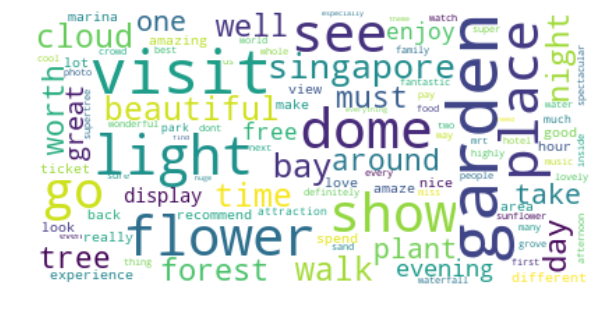

In [65]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = ' '.join(final_list_of_words)
# Display the generated image:
wordcloud = WordCloud(max_font_size=50,
                      max_words=100,
                      background_color="white", 
                      collocations = False).generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


## Remove words that are not meaningful

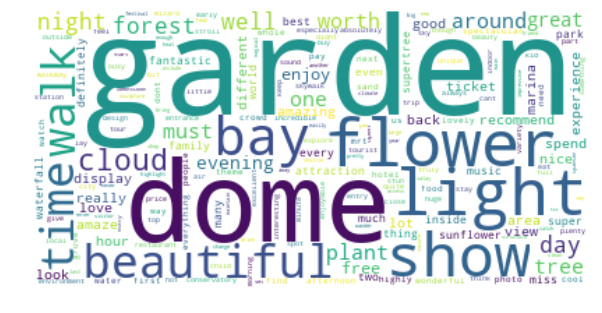

In [66]:
# Create stopword list:
stopwords1 = set(STOPWORDS)
stopwords1.update(["visit", "see", "go", "take",'make','singapore','sure','place'])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords1, 
                      background_color="white",
                      collocations = False).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show() 

# LDA 

In [10]:
import gensim
from gensim import corpora
from nltk.stem.wordnet import WordNetLemmatizer
import string

In [67]:
# convert all reviews into 
doc_complete = review

In [68]:
doc_complete[:5]

['well worth a visit especially after dark when they have a magical light show very interesting gardens with displays from around the world self sustaining and ecologically sensitive even the light show so its very special',
 'is was a very enjoyable day with all the beautiful flowers lots of photo taking to take with family and friends',
 'so wonderful and so great for the light and sound in the night time travelling to there is very convenient',
 'im going to review this from a typical mans point when im on holiday cultural places or places of interest tend to fill me with dread im happy sat in a street restaurant or bar to watch the world go by so trust me when i say go to the gardens you will love it and its for everyone we purchased our tickets on line with a nice discount all in we paid sd263 but this included universal studios the following day for three people so roughly 56 00 the email arrived promptly from a company called isango and the tickets were to be collected from the 

In [69]:
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

doc_clean = [clean(doc).split() for doc in doc_complete]   

In [70]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]

In [71]:
#running LDA model
Lda = gensim.models.ldamodel.LdaModel
ldamodel = Lda(doc_term_matrix, num_topics = 15, id2word = dictionary, passes = 50)

In [72]:
#Results
print(ldamodel.print_topics(num_topics = 15, num_words = 5))

[(0, '0.025*"dome" + 0.018*"garden" + 0.017*"flower" + 0.015*"cloud" + 0.015*"forest"'), (1, '0.027*"garden" + 0.016*"flower" + 0.015*"dome" + 0.014*"singapore" + 0.012*"time"'), (2, '0.021*"singapore" + 0.018*"garden" + 0.015*"light" + 0.015*"visit" + 0.013*"show"'), (3, '0.028*"garden" + 0.018*"beautiful" + 0.017*"visit" + 0.014*"singapore" + 0.012*"worth"'), (4, '0.042*"place" + 0.019*"well" + 0.018*"beautiful" + 0.017*"visit" + 0.012*"garden"'), (5, '0.020*"garden" + 0.016*"get" + 0.015*"day" + 0.013*"visit" + 0.013*"singapore"'), (6, '0.037*"show" + 0.033*"light" + 0.026*"garden" + 0.023*"night" + 0.018*"place"'), (7, '0.010*"beautiful" + 0.010*"area" + 0.010*"see" + 0.009*"well" + 0.009*"crowd"'), (8, '0.023*"garden" + 0.019*"see" + 0.017*"place" + 0.015*"time" + 0.011*"lot"'), (9, '0.033*"dome" + 0.029*"flower" + 0.018*"cloud" + 0.017*"visit" + 0.017*"forest"'), (10, '0.021*"get" + 0.017*"place" + 0.016*"go" + 0.012*"garden" + 0.011*"bay"'), (11, '0.023*"see" + 0.021*"garden" + 